# CPP: Identification of physicochemical signatures
**Comparative Physicochemical Profiling (CPP)** is a sequence-based algorithm for interpretable feature engineering. It is the centerpiece of AAanalysis, introduced in [Breimann24c]_. 

The aim of the CPP algorithm is to identify a set of unique, non-redundant features that are most discriminant between the test and reference group of sequences. We call this feature set and its visual representation the **physicochemical signature** of the test group, which can be interpreted at group and sample level with single-residue resolution.

We will demonstrate this in three steps:
    
1. **Feature Creation**
2. **Group Level CPP Analysis**
3. **Sample Level CPP Analysis**

**1. Feature Creation**

To create an ``CPP`` object, you just need to provide a valid ``df_parts`` DataFrame:

In [2]:
import aaanalysis as aa
aa.options["verbose"] = False
aa.options["random_state"] = 42

# Load example dataset
df_seq = aa.load_dataset(name="DOM_GSEC")
labels = df_seq["label"].to_list()
sf = aa.SequenceFeature()

# Create Parts
df_parts = sf.get_df_parts(df_seq=df_seq)

# Create CPP object and run with default splits and scales
cpp = aa.CPP(df_parts=df_parts)


A non-redundant set of physicochemical features is obtained through the ``CPP.run()`` method:

In [3]:
# Run CPP algorithm to obtain 100 features (default)
df_feat = cpp.run(labels=labels, n_filter=100)
aa.display_df(df=df_feat, n_rows=8, show_shape=True)

DataFrame shape: (100, 13)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions
1,"TMD_C_JMD_C-Seg...2,3)-QIAN880106",Conformation,α-helix,α-helix (middle),"Weights for alp...ejnowski, 1988)",0.387000,0.118000,0.118000,0.068000,0.080000,0.000000,0.000000,"27,28,29,30,31,32,33"
2,"TMD_C_JMD_C-Pat...,14)-CRAJ730103",Conformation,β-turn,β-turn,"Normalized freq...d et al., 1973)",0.377000,0.285000,-0.285000,0.164000,0.177000,0.000000,0.000000,"27,31"
3,"TMD_C_JMD_C-Seg...6,9)-FAUJ880104",Shape,Side chain length,Steric parameter,"STERIMOL length...e et al., 1988)",0.367000,0.263000,0.263000,0.161000,0.168000,0.000000,0.000000,"32,33"
4,"TMD_C_JMD_C-Seg...6,9)-ONEK900101",Others,Unclassified (Others),ΔG values in peptides,"Delta G values ...-DeGrado, 1990)",0.366000,0.111000,0.111000,0.070000,0.114000,0.000000,0.000000,"32,33"
5,"TMD_C_JMD_C-Pat...,15)-QIAN880107",Conformation,α-helix,α-helix (middle),"Weights for alp...ejnowski, 1988)",0.363000,0.162000,0.162000,0.091000,0.118000,0.000000,0.000000,"24,28,32,35"
6,"TMD_C_JMD_C-Seg...3,4)-HUTJ700103",Energy,Entropy,Entropy,"Entropy of form...Hutchens, 1970)",0.360000,0.187000,0.187000,0.115000,0.128000,0.000000,0.000000,"31,32,33,34,35"
7,"TMD_C_JMD_C-Seg...2,3)-WOLS870103",Others,PC 4,Principal Component 3 (Wold),"Principal prope...d et al., 1987)",0.359000,0.159000,-0.159000,0.090000,0.130000,0.000000,0.000000,"27,28,29,30,31,32,33"
8,"TMD_C_JMD_C-Pat...,12)-CRAJ730103",Conformation,β-turn,β-turn,"Normalized freq...d et al., 1973)",0.352000,0.227000,-0.227000,0.150000,0.170000,0.000000,0.000000,"24,28,32"


**2. Group Level CPP Analysis**

The ``CPPPlot`` class provides various methods for visualizing single to all features. For further analysis, we need to add the group level feature importance using the ``TreeModel`` class: 

In [4]:
# Create feature matrix
sf = aa.SequenceFeature()
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

# Fit TreeModel
tm = aa.TreeModel()
tm = tm.fit(X, labels=labels)

# Add feature importance
df_feat = tm.add_feat_importance(df_feat=df_feat)

The top 15 features can be visualized using the ``CPPPlot.ranking()`` method

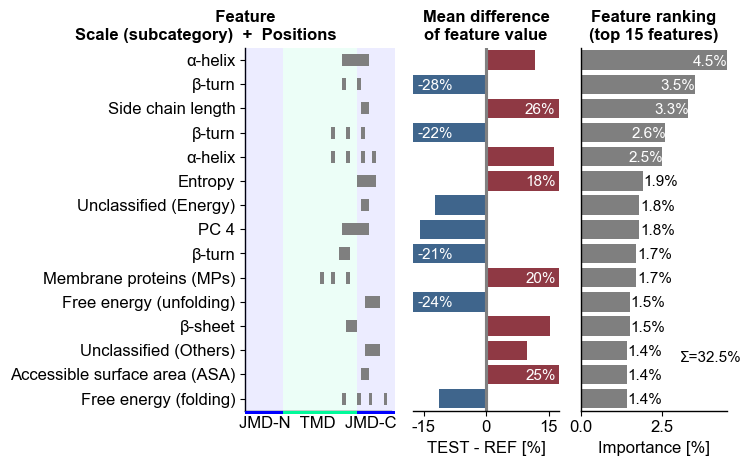

In [5]:
import matplotlib.pyplot as plt

# CPP ranking
cpp_plot = aa.CPPPlot()
aa.plot_settings(weight_bold=False, short_ticks=True)
cpp_plot.ranking(df_feat=df_feat)
plt.show()

The difference of feature values between the test and the reference group can be displayed for any selected feature using the ``CPPPlot.feature()`` method:

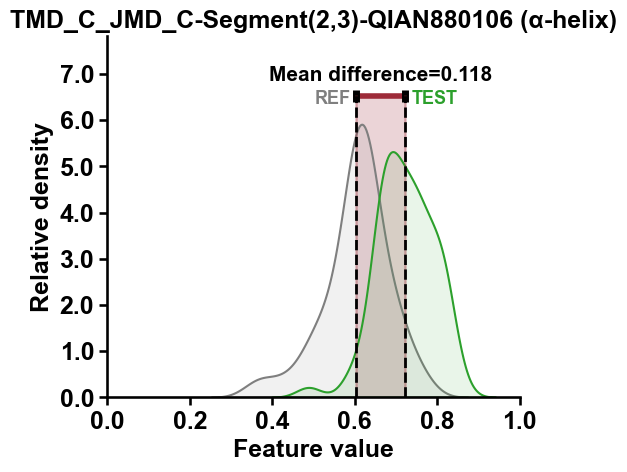

In [9]:
# Sort features
df_feat = df_feat.sort_values(by="feat_importance", ascending=False).reset_index(drop=True)

# Show feature value distribution for best feature
top_feature = df_feat["feature"][0]
top_subcategory = df_feat["subcategory"][0]
aa.plot_settings()
cpp_plot.feature(feature=top_feature , df_seq=df_seq, labels=labels)
plt.title(f"{top_feature} ({top_subcategory})")
plt.show()

The feature value difference can be either positive (the test dataset has higher values, indicated in red) or negative (the test dataset has lower values, indicated in blue):

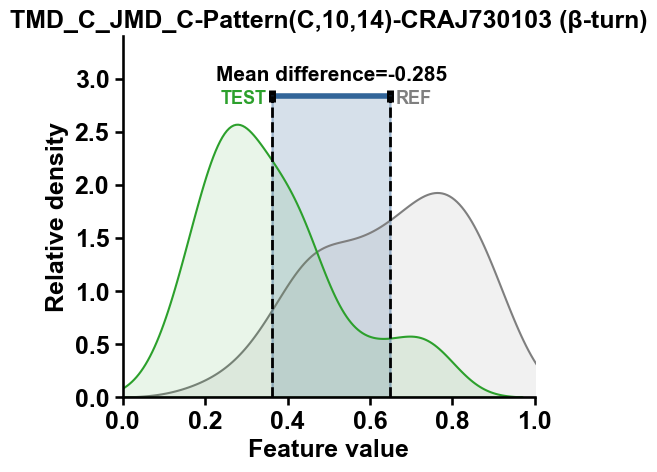

In [8]:
# Show feature value distribution for second best feature
top_feature = df_feat["feature"][1]
top_subcategory = df_feat["subcategory"][1]
aa.plot_settings()
cpp_plot.feature(feature=top_feature , df_seq=df_seq, labels=labels)
plt.title(f"{top_feature} ({top_subcategory})")
plt.show()

To visualize the importance of all features at single-residue resolution, the cumulative feature importance per residue position can be shown using the ``CPPPlot.profile()`` method:

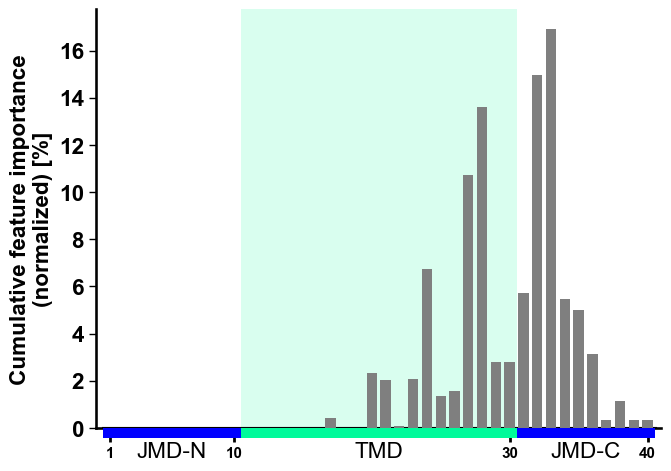

In [10]:
# Plot CPP profile
aa.plot_settings(font_scale=0.9)
cpp_plot.profile(df_feat=df_feat)
plt.show()

The complete feature landscape can be charted using the ``CPPPlot.feature_map()`` method. This CPP feature map shows the feature value difference and feature importance per residue and scale subcategory, which are described and discussed in our `AAontology`` ([AAontology Usage Principles](https://aaanalysis.readthedocs.io/en/latest/index/usage_principles/aaontology.html), [Breimann24b]_):

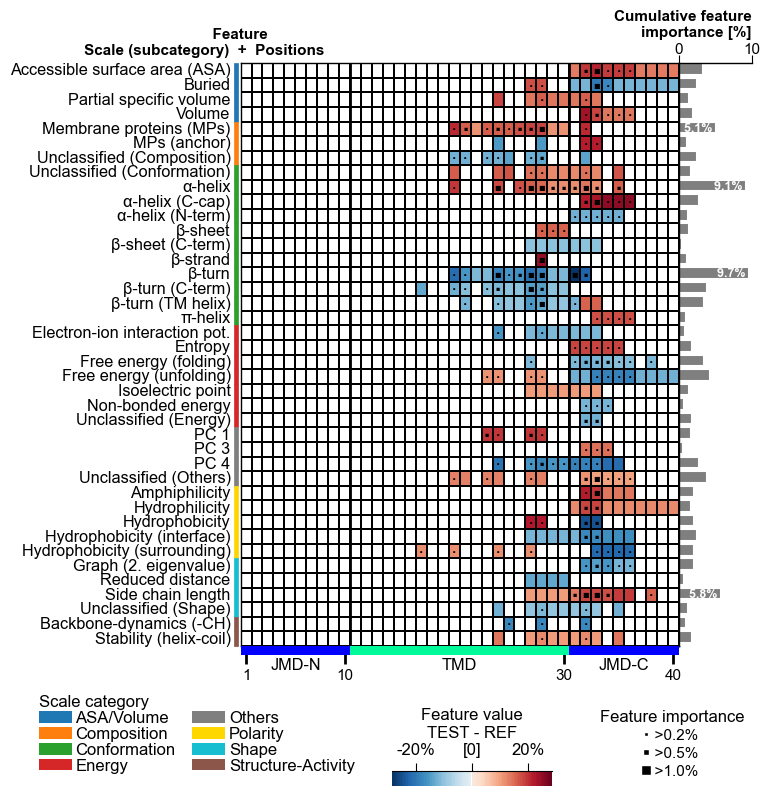

In [11]:
# Plot CPP feature map
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=0.65, weight_bold=False)
cpp_plot.feature_map(df_feat=df_feat)
plt.show()

**3. CPP Analysis ("Sample Level")**

You can provide individual sequence parts to the plotting methods to translate the results of the group level CPP features onto a specific sample.  

In [12]:
# Get sequences parts for APP
_df_parts = sf.get_df_parts(df_seq=df_seq, list_parts=["tmd", "jmd_c", "jmd_n"])
_args_seq = _df_parts.loc["P05067"].to_dict()
args_seq = {key + "_seq": _args_seq[key] for key in _args_seq}

Provide the parts as ``tmd_seq``, ``jmd_n_seq``, and ``jmd_c_seq`` parameters to the ``CPPPlot.profile()`` method: 

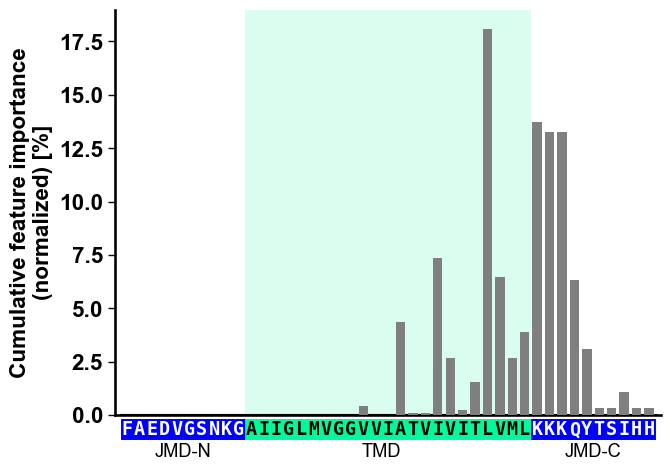

In [13]:
# Plot CPP profile ("sample level")
aa.plot_settings(font_scale=0.9)
cpp_plot.profile(df_feat=df_feat, **args_seq)
plt.show()

Or to the ``CPPPlot.feature_map`` method:

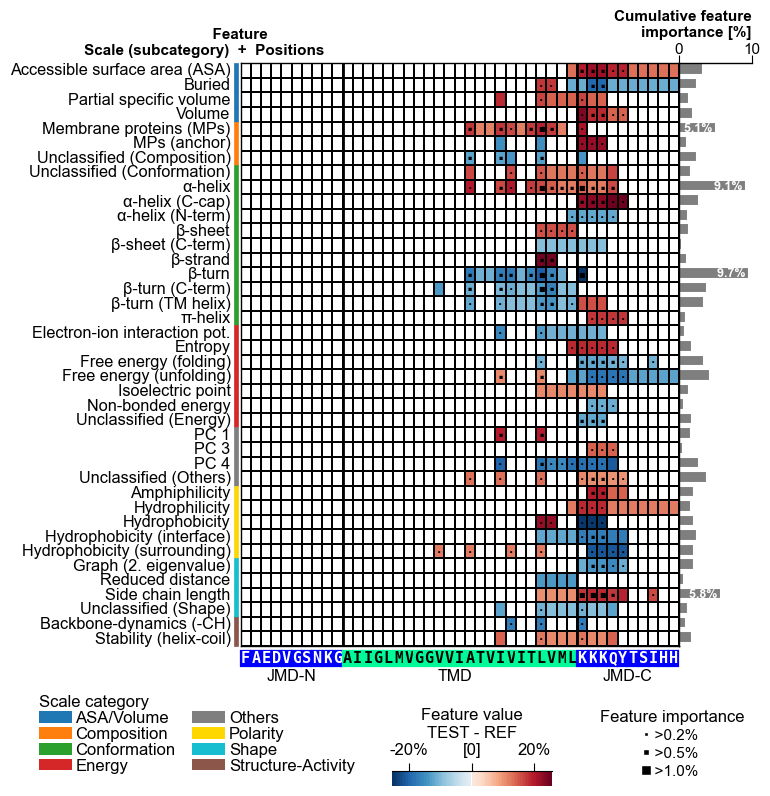

In [14]:
# Plot CPP feature map ("sample level")
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=0.65, weight_bold=False)
cpp_plot.feature_map(df_feat=df_feat, **args_seq)
plt.show()

However, these are still the general results but only visualized for a specific sample sequence. To obtain the sample-specific feature value difference and feature impact, see the [Explainable AI Tutorial](https://aaanalysis.readthedocs.io/en/latest/generated/tutorial5a_shap_explainer.html).

For more details on the ``CPP`` and ``CPPPlot`` classes are given in the [Feature Engineering API](https://aaanalysis.readthedocs.io/en/latest/api.html#feature-engineering). To delve deeper into the feature concept, see the [CPP Usage Principles](https://aaanalysis.readthedocs.io/en/latest/index/usage_principles/feature_identification.html) section.